# Importing Libraries
Numpy, Pandas, Matplotlib(pyplot) and fbprophet (Facebook's API used for prediction and forecasts.)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet

data=pd.read_csv("/content/AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-22,78.942497,79.807503,78.837502,79.722504,79.188927,81803200
1,2020-05-26,80.875000,81.059998,79.125000,79.182503,78.652542,125522000
2,2020-05-27,79.035004,79.677498,78.272499,79.527496,78.995224,112945200
3,2020-05-28,79.192497,80.860001,78.907501,79.562500,79.029984,133560800
4,2020-05-29,79.812500,80.287498,79.117500,79.485001,78.953018,153532400


# Visualization of the "Close" column.

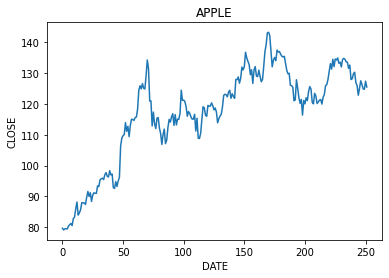

In [13]:
close=data['Close']
ax=close.plot(title="APPLE")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

We only need two columns from this dataset which are date and close.

In [14]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

We are using Facebook Prophet model,  for predicting the stock prices of Tesla

In [15]:
data=data.rename(columns={"Date":"ds","Close":"y"})

# Prediction

In [16]:
model=Prophet.Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-05-17,124.026059,73.431488,175.643356
613,2022-05-18,123.749139,73.822106,175.575977
614,2022-05-19,123.735868,72.662970,176.756373
615,2022-05-20,123.396157,71.956102,176.468521
616,2022-05-21,125.272099,73.992556,177.861201


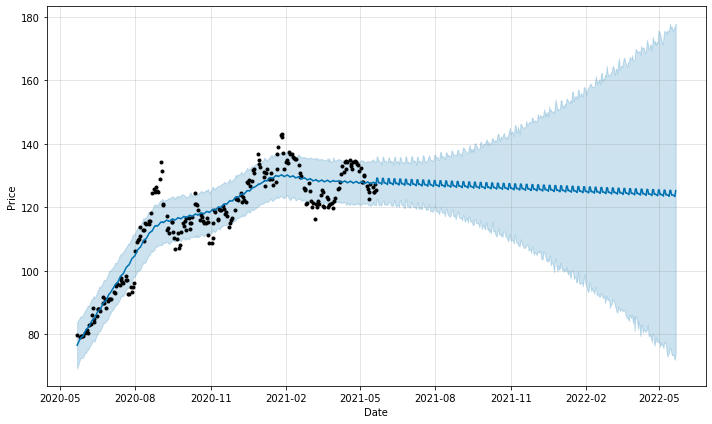

In [17]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")